In [249]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
%connect_info
# %qtconsole

{
  "shell_port": 58140,
  "iopub_port": 58141,
  "stdin_port": 58142,
  "control_port": 58144,
  "hb_port": 58143,
  "ip": "127.0.0.1",
  "key": "a6c1eacb-816fe7622a3e62a0df043ae9",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-1aed2008-71b9-4ea3-996b-f895fe9d4b10.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


Import data from csv fies

In [537]:
nextprot_dat = pd.read_csv('../data/nextprot-proteins.csv')
nextprot_dat.head()

,acc_code,protein_name,gene_name_s,chromosome,proteomics,disease,structure,number_isof,number_variants,number_ptms,mutagenesis,tissue_expr,pe
0,A0A024RBG1,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,1q21.2,yes,no,no,1,0,0,no,yes,Evidence at protein level
1,A0A075B6H7,Probable non-functional immunoglobulin kappa v...,IGKV3-7,2p11.2,yes,no,no,1,187,1,no,yes,Evidence at protein level
2,A0A075B6H8,Probable non-functional immunoglobulin kappa v...,IGKV1D-42,2p11.2,yes,no,no,1,140,1,no,yes,Evidence at protein level
3,A0A075B6H9,Immunoglobulin lambda variable 4-69,IGLV4-69,22q11.22,yes,no,no,1,318,1,no,yes,Evidence at protein level
4,A0A075B6I0,Immunoglobulin lambda variable 8-61,IGLV8-61,22q11.22,yes,no,no,1,256,1,no,yes,Evidence at protein level


In [251]:
ppi_dat = pd.read_csv('../data/STRING/STRING-interaction-swiss.csv')
ppi_dat.head()

,protein1_acc,protein2_acc,combined_score
0,P84085,Q14123,155
1,P84085,Q13177,197
2,P84085,O95755,222
3,P84085,Q13905,181
4,P84085,Q15057,767


In [539]:
proteins = pd.read_csv('../data/proteins-sample-0981.csv')
proteins = proteins[proteins['protein_accession'].isin(nextprot_dat['acc_code'])]
proteins.head()

,protein_accession,protein_score,protein_avg_mass,protein_matched_products,protein_matched_peptides,protein_digest_peps,protein_seq_cover_percent,protein_matched_peptide_inten_sum,protein_top3matched_peptide_inten_sum,protein_matched_product_inten_sum,protein_auto_curate,protein_sum_num_by_calc,protein_sum_num_by_pep_frag1,protein_num_unique_peptides
0,Q96EG1,0.0,57913.1781,0,1,33,0.0,2767,0.0,339,Green,5.981677,0,0
1,Q8TEX9,0.0,120633.6768,3,1,84,0.0,1469,0.0,488,Red,6.113683,0,0
2,Q0VDD8,0.0,405223.5318,10,3,268,0.0,13319,0.0,2544,Red,19.128590,0,0
3,Q9HCH5,0.0,105285.2734,1,3,85,0.0,130667,0.0,422,Green,28.732410,0,0
4,Q9BYN7,0.0,95001.7193,7,2,43,0.0,3633,0.0,1708,Red,7.312799,0,0


In [540]:
proteins.describe()

,protein_score,protein_avg_mass,protein_matched_products,protein_matched_peptides,protein_digest_peps,protein_seq_cover_percent,protein_matched_peptide_inten_sum,protein_top3matched_peptide_inten_sum,protein_matched_product_inten_sum,protein_sum_num_by_calc,protein_sum_num_by_pep_frag1,protein_num_unique_peptides
count,10628.000000,1.062800e+04,10628.000000,10628.000000,10628.000000,10628.000000,1.062800e+04,1.062800e+04,10628.000000,10628.000000,10628.000000,10628.0
mean,126.834218,8.318720e+04,6.988709,2.125706,55.387561,5.013868,5.208421e+04,6.981194e+03,2580.636714,12.854394,4.344938,0.0
std,574.916775,7.532698e+04,5.472866,1.499351,50.465219,5.842536,1.744397e+05,6.939676e+04,7427.548638,11.681110,3.039798,0.0
min,0.000000,2.391932e+03,0.000000,1.000000,1.000000,0.000000,1.250000e+03,0.000000e+00,0.000000,3.584394,0.000000,0.0
25%,10.581900,3.938988e+04,3.000000,1.000000,26.000000,1.750000,4.299750e+03,0.000000e+00,591.000000,6.651505,3.000000,0.0
50%,26.929400,6.208700e+04,6.000000,2.000000,42.000000,3.150000,1.223550e+04,0.000000e+00,1196.000000,9.408626,3.000000,0.0
75%,76.026575,1.025665e+05,9.000000,3.000000,69.000000,6.020000,3.778425e+04,0.000000e+00,2413.000000,14.720907,5.000000,0.0
max,21668.070000,1.521735e+06,81.000000,27.000000,788.000000,80.260000,6.112216e+06,3.433368e+06,391390.000000,302.534400,65.000000,0.0




## generate protein reference set

In [541]:
# the _2 data was created by first filter with spectral count >= 2 then normalized with NSAF
dat_nasf = pd.read_csv('../data/gastric-primary-cell/gastric_primary_cell_nsaf_2.csv')
dat_nasf.rename(columns={'Unnamed: 0': 'accession'}, inplace=True)
dat_nasf = dat_nasf[dat_nasf['accession'].isin(nextprot_dat['acc_code'])]
dat_nasf.head()

,accession,IP0981_1701,IP0982_1701,IP0993_1701,IP0995_1701,IP0999_1701,IP7100_1701,IP7103_1701,IP7105_1701
108,A0A087WW87,0.000000,110.725205,109.744275,0.0,0.0,0.0,0.000000,0.000000
177,A0A087X0M5,428.425824,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
228,A0A096LP55,0.000000,490.760068,583.694824,0.0,0.0,0.0,775.691708,560.127879
251,A0A0A0MS15,276.016638,0.000000,0.000000,0.0,0.0,0.0,0.000000,142.777695
302,A0A0B4J268,0.000000,81.943424,0.000000,0.0,0.0,0.0,0.000000,0.000000


## generate reference dataset

In [542]:
# protein that is detected in at least half of sample of similar setting are consider as positive proteins
rowsum = np.sum(dat_nasf.iloc[:, ~dat_nasf.columns.isin(['IP0981_1701', 'IP7103_1701'])].values == 0, axis=1)
filter = rowsum >= 3
protein_reference = dat_nasf[filter]['accession']

In [543]:
dat_spc = pd.read_csv('../data/gastric-primary-cell/gastric_primary_cell_count.csv')
dat_spc.rename(columns={'Unnamed: 0': 'accession'}, inplace=True)
dat_spc = dat_spc[dat_spc['accession'].isin(nextprot_dat['acc_code'])]
dat_spc.head()

,accession,IP0981_1701,IP0982_1701,IP0993_1701,IP0995_1701,IP0999_1701,IP7100_1701,IP7103_1701,IP7105_1701
15,A0A075B6R2,0,0,0,0,0,0,1,0
110,A0A087WW87,0,3,2,0,0,0,0,0
181,A0A087X0M5,3,0,0,0,0,0,0,0
236,A0A096LP55,1,10,8,0,0,0,6,6
259,A0A0A0MS15,2,0,0,0,0,0,0,2


Text(0.5, 0.98, 'Spectral count distribution for the primary cell gastric cancer sample')

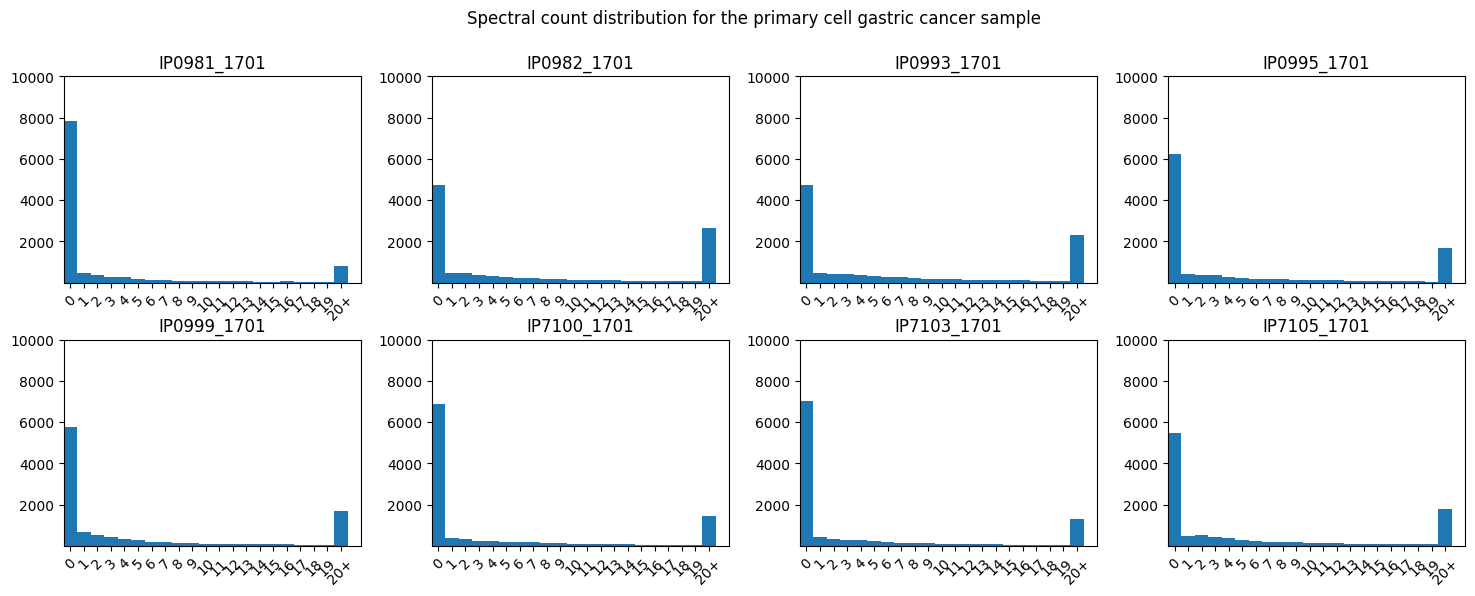

In [544]:
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Spectral count distribution for the primary cell gastric cancer sample')
fig.tight_layout(pad=2)
bins = np.arange(0, 21, 1)
for idx, col in enumerate(dat_spc.columns[1:]):
    first_axis = int(idx / 4)
    second_axis = int(idx % 4)
    sub_ax = ax[first_axis][second_axis]
    _ = sub_ax.set_ylim([1, 10000]);
    _ = sub_ax.hist(np.clip(dat_spc[col], bins[0], bins[-1]), bins=np.arange(0, 22));
    _ = sub_ax.set_title(col);
    _ = sub_ax.set_xlim(0, 22)
    _ = sub_ax.set_xticks(bins + 0.5)
    xlabels = bins[0:].astype(str)
    xlabels[-1] += '+'
    _ = sub_ax.set_xticklabels(xlabels, rotation=45)

Text(0.5, 0.98, 'Spectral count distribution for the primary cell gastric cancer sample')

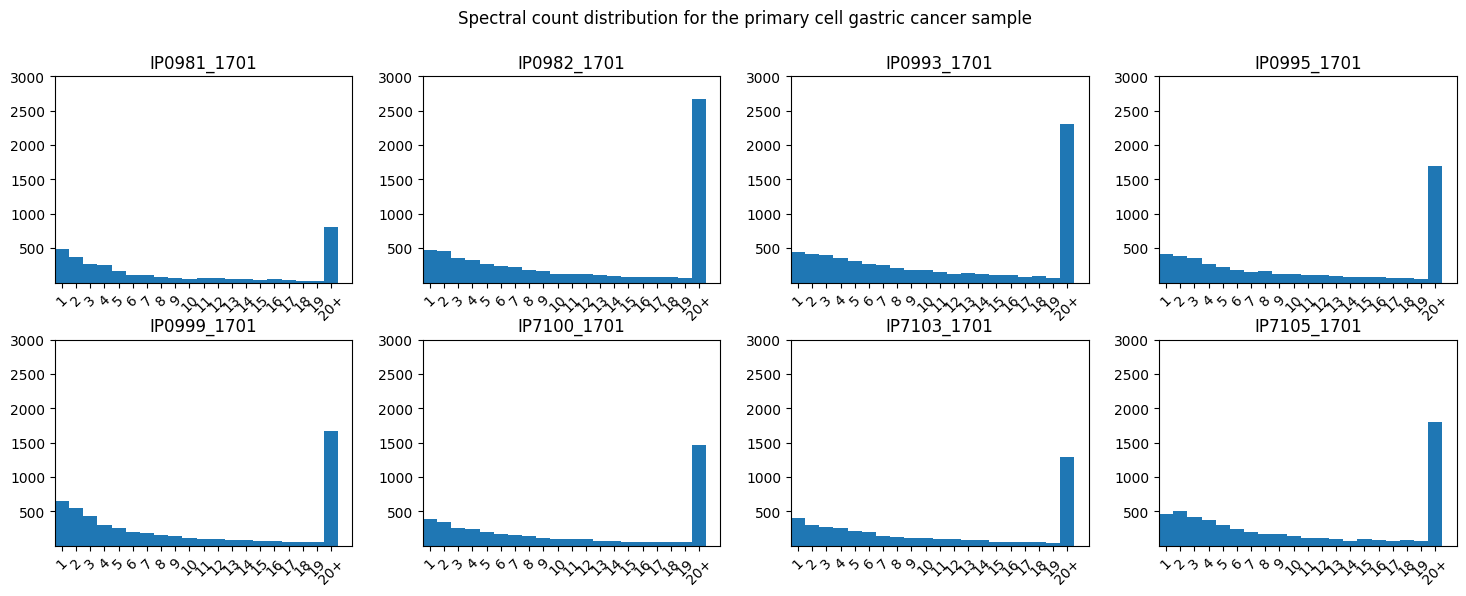

In [545]:
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Spectral count distribution for the primary cell gastric cancer sample')
fig.tight_layout(pad=2)
bins = np.arange(1, 21, 1)
for idx, col in enumerate(dat_spc.columns[1:]):
    first_axis = int(idx / 4)
    second_axis = int(idx % 4)
    sub_ax = ax[first_axis][second_axis]
    _ = sub_ax.set_ylim([1, 3000]);
    _ = sub_ax.hist(np.clip(dat_spc[col][dat_spc[col] != 0], bins[0], bins[-1]), bins=np.arange(1, 22));
    _ = sub_ax.set_title(col);
    _ = sub_ax.set_xlim(1, 22)
    _ = sub_ax.set_xticks(bins + 0.5)
    xlabels = bins[0:].astype(str)
    xlabels[-1] += '+'
    _ = sub_ax.set_xticklabels(xlabels, rotation=45)


Text(0.5, 0.98, 'Spectral count distribution for the primary cell gastric cancer sample')

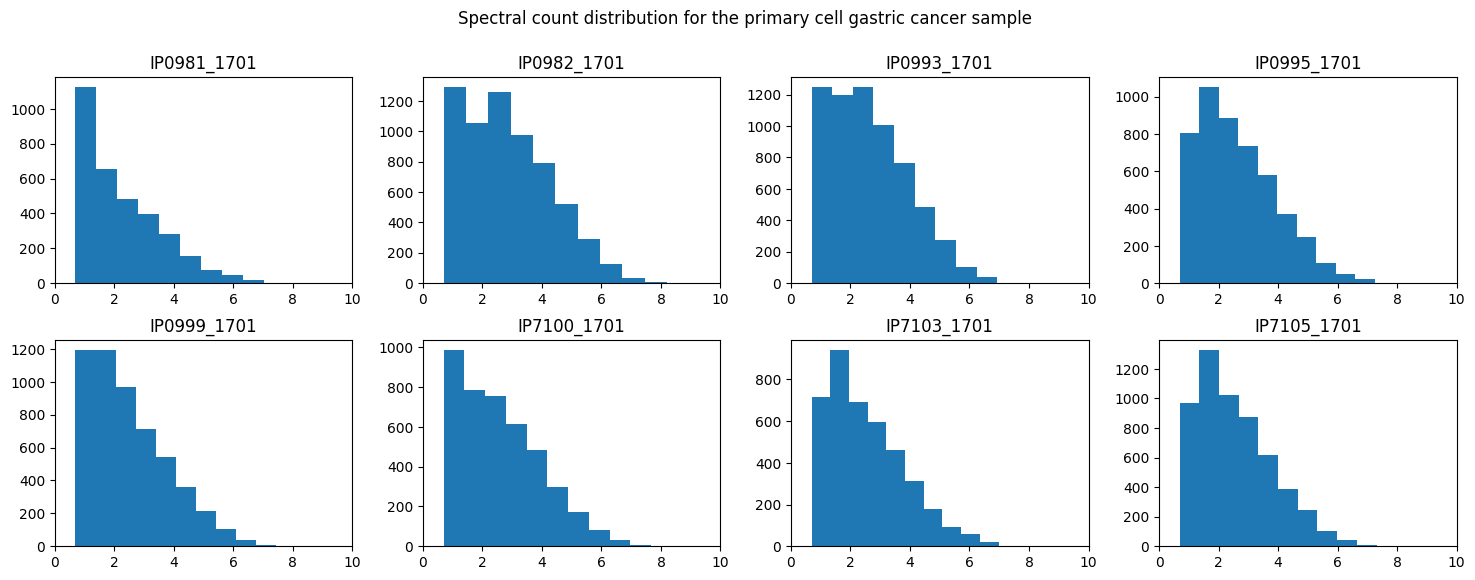

In [546]:
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Spectral count distribution for the primary cell gastric cancer sample')
fig.tight_layout(pad=2)
bins = np.arange(0, 10, 1)
for idx, col in enumerate(dat_spc.columns[1:]):
    first_axis = int(idx / 4)
    second_axis = int(idx % 4)
    sub_ax = ax[first_axis][second_axis]
    # _ = sub_ax.set_ylim([1, 20000]);
    _ = sub_ax.hist(np.log(dat_spc[col][dat_spc[col] != 0] + 1));
    _ = sub_ax.set_title(col);
    _ = sub_ax.set_xlim(0, 10)

In [547]:
# protein_reference = pd.read_csv('../data/expressed-protein.csv')
# protein_reference.head()

In [548]:
# use protein reference dataset to create classification label
proteins['expressed'] = proteins.protein_accession.isin(protein_reference).astype(int)
proteins['expressed']
# nrow = proteins.shape[0]
# # proteins.train_masking = [np.repeat(1, 0.6 * nrow), np.repeat(0, 0.6 * nrow)]
# # proteins.train_masking[0: nrow*0.8] = 1
# # proteins. val_masking =
# # proteins.test_masking =

0        0
1        0
2        1
3        1
4        0
        ..
10623    0
10624    0
10625    0
10626    0
10627    0
Name: expressed, Length: 10628, dtype: int64

In [549]:
uniprot_dat = pd.read_table('../data/uniprot_protein_entries.tsv', sep='\t')
uniprot_dat.head()

,Entry,Entry Name,Protein names,Organism,Length,Mass,Gene Names (primary)
0,A0A087X1C5,CP2D7_HUMAN,Putative cytochrome P450 2D7 (EC 1.14.14.1),Homo sapiens (Human),515,57489,CYP2D7
1,A0A0B4J2F0,PIOS1_HUMAN,Protein PIGBOS1 (PIGB opposite strand protein 1),Homo sapiens (Human),54,6313,PIGBOS1
2,A0A0B4J2F2,SIK1B_HUMAN,Putative serine/threonine-protein kinase SIK1B...,Homo sapiens (Human),783,84930,SIK1B
3,A0A0C5B5G6,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,Homo sapiens (Human),16,2175,MT-RNR1
4,A0A0K2S4Q6,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,Homo sapiens (Human),201,21806,CD300H


## augment node attributes with protein information from nextprot

In [550]:
# check all proteins in the protein dataset are nextprot Swiss-Prot proteins
proteins['protein_accession'].isin(nextprot_dat['acc_code']).all()
proteins = proteins.merge(nextprot_dat, how='left', left_on='protein_accession', right_on='acc_code')
proteins = proteins.merge(uniprot_dat, how='left', left_on='protein_accession', right_on='Entry')

True

In [641]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(nextprot_dat['acc_code'])
le.classes_

LabelEncoder()

array(['A0A024RBG1', 'A0A075B6H7', 'A0A075B6H8', ..., 'W5XKT8', 'W6CW81',
       'X6R8D5'], dtype=object)

Transform protein accession to integer ID

In [552]:
# proteins['acc_int_id'] = le.transform(proteins['protein_accession'])
# ppi_dat['protein1_acc_int_id'] = le.transform(ppi_dat['protein1_acc'])
# ppi_dat['protein2_acc_int_id'] = le.transform(ppi_dat['protein2_acc'])

## Proteins in PPI dataset but not in protein dataset
The protein dataset contain protein existence evidence information from an experiment (mostly  calculated protein identification features from MS spectrum)

The number of unique proteins in protein dataset and PPI dataset may not be the same.
We can either: 1. create those new protein entry in the protein dataset
or 2. only use PPI interaction information about proteins that exist in the protein dataset

In [553]:
# use approach 2 for simplicity
ppi_dat = ppi_dat[ppi_dat.protein1_acc.isin(proteins.protein_accession) & ppi_dat.protein2_acc.isin(proteins.protein_accession)]

# Create customized dataset

In [554]:
mapping = {index: i for i, index in enumerate(proteins.protein_accession.unique())}

In [555]:
# import torch
# node_attr = proteins.loc[:, ~proteins.columns.isin(['protein_accession', 'protein_auto_curate', 'chromosome'])]
# node_attr
# node_attr.loc[:, 'protein_score'] = np.log10(node_attr.protein_score + 1)

In [556]:
le_pe_evidence = LabelEncoder()
pe_encoding = le_pe_evidence.fit_transform(proteins['pe'])

le_mutagensis = LabelEncoder()
mutagensis_encoding = le_mutagensis.fit_transform(proteins['mutagenesis'])

le_tissue_expr = LabelEncoder()
tissue_expr_encoding = le_tissue_expr.fit_transform(proteins['tissue_expr'])

In [557]:
# need to define some helper encoder and transformer class

class LogTransformation(object):
    def __init__(self, dtype=None):
        self.dtype = dtype

    def __call__(self, df):
        return torch.from_numpy(np.log10(df.values+ 1)).view(-1, 1).to(self.dtype)

In [633]:
# log_transformer = LogTransformation(dtype=torch.float)
# log_protein_score = log_transformer(node_attr.protein_score)

# to-do: need to standardized features
x1 = proteins.loc[:, ['protein_avg_mass', 'protein_matched_products', 'protein_matched_peptides', 'protein_digest_peps', 'protein_seq_cover_percent', 'protein_matched_peptide_inten_sum',
             'protein_top3matched_peptide_inten_sum', 'protein_matched_product_inten_sum', 'protein_sum_num_by_calc', 'protein_sum_num_by_pep_frag1',
                      'number_isof', 'number_ptms', 'number_variants']].values

x= torch.tensor(np.hstack([x1, pe_encoding[:, np.newaxis], mutagensis_encoding[:, np.newaxis], tissue_expr_encoding[:, np.newaxis]]), dtype=torch.float)

# x = torch.from_numpy(node_attr.to_numpy(dtype=float)).to(dtype=torch.float)
# label variable need to be a (N, ) tensor
expressed = torch.tensor(proteins.expressed.values).view(-1).to(dtype=torch.float)
# x = torch.cat([log_protein_score], dim=-1)
# also need train_masking, test_masking

Create train, val, test masking variable tensor

In [572]:
import torch_geometric.transforms as T
split_transformer = T.RandomNodeSplit(split='train_rest', num_splits=1, num_val=0.2, num_test=0.2)

In [573]:
src = [mapping[index] for index in ppi_dat.protein1_acc]
dst = [mapping[index] for index in ppi_dat.protein2_acc]
edge_index = torch.tensor([src, dst])
edge_index_reverse = torch.tensor([dst, src])
edge_index = torch.cat([edge_index, edge_index_reverse], dim=-1)

In [574]:
edge_attr = torch.tensor(ppi_dat.combined_score.values.repeat(2)).view(-1, 1)

In [575]:
from  torch_geometric.data import Data

In [576]:
# create graph dataset with node features, edge index, and edge attributes
# the ground-truth label need to be fed as an additional variable to use RandomNodeSplit transformer
dataset = Data(x=x, edge_index=edge_index, split=1, edge_attr=edge_attr, y=expressed)
dataset

Data(x=[10628, 16], edge_index=[2, 9877432], edge_attr=[9877432, 1], y=[10628], split=1)

In [577]:
dataset = split_transformer(dataset)
dataset
dataset.x

Data(x=[10628, 16], edge_index=[2, 9877432], edge_attr=[9877432, 1], y=[10628], split=1, train_mask=[10628], val_mask=[10628], test_mask=[10628])

tensor([[5.7913e+04, 0.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [1.2063e+05, 3.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.0522e+05, 1.0000e+01, 3.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [2.2435e+04, 2.7000e+01, 3.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.6053e+04, 6.6000e+01, 8.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.7335e+04, 5.3000e+01, 4.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [578]:
print(f'Number of nodes: {dataset.num_nodes}')
print(f'Number of node features: {dataset.num_node_features}')
print(f'Number of edges: {dataset.num_edges}')
print(f'Number of edge features: {dataset.num_edge_features}')
print(f'Average node degree: {dataset.num_edges / dataset.num_nodes:.2f}')
print(f'Number of training nodes: {dataset.train_mask.sum()}')
print(f'Training node label rate: {int(dataset.train_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Validation node label rate: {int(dataset.val_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Test node label rate: {int(dataset.test_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Has isolated nodes: {dataset.has_isolated_nodes()}')
print(f'Has self-loops: {dataset.has_self_loops()}')
print(f'Is undirected: {dataset.is_undirected()}')

Number of nodes: 10628
Number of node features: 16
Number of edges: 9877432
Number of edge features: 1
Average node degree: 929.38
Number of training nodes: 6376
Training node label rate: 0.60
Validation node label rate: 0.20
Test node label rate: 0.20
Has isolated nodes: True
Has self-loops: False
Is undirected: False


In [1048]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        # x = F.normalize(x)
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x


In [617]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(num_features=dataset.num_node_features, hidden_channels=16, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(dataset.x)  # Perform a single forward pass.
      train_loss = criterion(out[dataset.train_mask], dataset.y[dataset.train_mask])  # Compute the loss solely based on the training nodes.
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      train_correct = pred[dataset.train_mask] == dataset.y[dataset.train_mask]  # Check against ground-truth labels.
      train_acc = int(train_correct.sum()) / int(dataset.train_mask.sum())
      train_loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return float(train_loss.detach()), train_acc


def val():
      model.eval()
      out = model(dataset.x)
      val_loss = criterion(out[dataset.val_mask], dataset.y[dataset.val_mask])
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      val_correct = pred[dataset.val_mask] == dataset.y[dataset.val_mask] # Check against ground-truth labels.
      val_acc = int(val_correct.sum()) / int(dataset.val_mask.sum())  # Derive ratio of correct predictions.
      return float(val_loss.detach()), val_acc

def test():
      model.eval()
      out = model(dataset.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[dataset.test_mask] == dataset.y[dataset.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(dataset.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 5):
    train_loss, train_acc = train()
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val()
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train loss: 0.7197 Train acc: 0.3965 Validation loss:  0.7025, Validation acc: 0.3189
Epoch: 002, Train loss: 0.7057 Train acc: 0.4446 Validation loss:  0.6904, Validation acc: 0.5880
Epoch: 003, Train loss: 0.6906 Train acc: 0.4873 Validation loss:  0.6801, Validation acc: 0.6312
Epoch: 004, Train loss: 0.6806 Train acc: 0.5111 Validation loss:  0.6711, Validation acc: 0.6769


Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

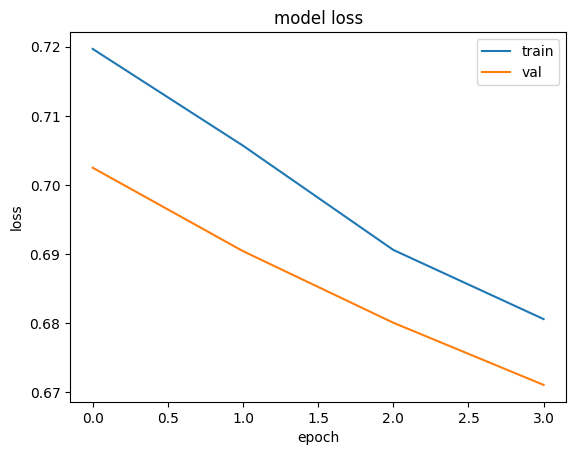

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'acc')

Text(0.5, 0, 'epoch')

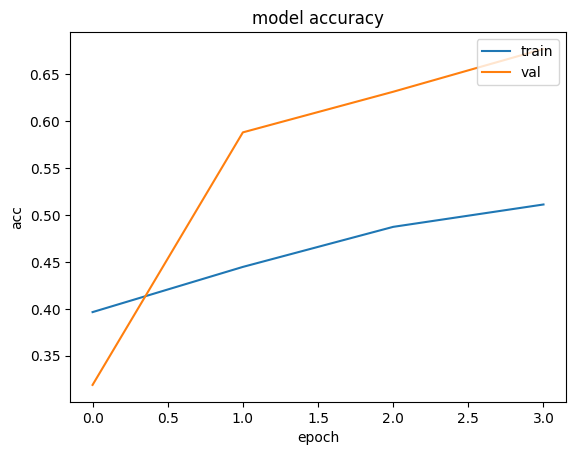

In [618]:
plt.plot(train_loss_history);
plt.plot(val_loss_history);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper right');
plt.show()

plt.plot(train_acc_history);
plt.plot(val_acc_history);
plt.title('model accuracy');
plt.ylabel('acc');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper right');
plt.show()

In [620]:
def test():
      model.eval()
      out = model(dataset.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[dataset.test_mask] == dataset.y[dataset.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(dataset.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

KeyboardInterrupt: 

In [1056]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        # x = F.normalize(x)
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(num_node_features=dataset.num_node_features, hidden_channels=16, num_classes=2)
print(model)

GCN(
  (conv1): GCNConv(16, 16)
  (conv2): GCNConv(16, 2)
)


In [519]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# uncomment if first time run
# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

1.12.1


GCN(
  (conv1): GCNConv(16, 16)
  (conv2): GCNConv(16, 2)
)

/Users/cgu3/opt/anaconda3/envs/graph-neural-network/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cgu3/opt/anaconda3/envs/graph-neural-network/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


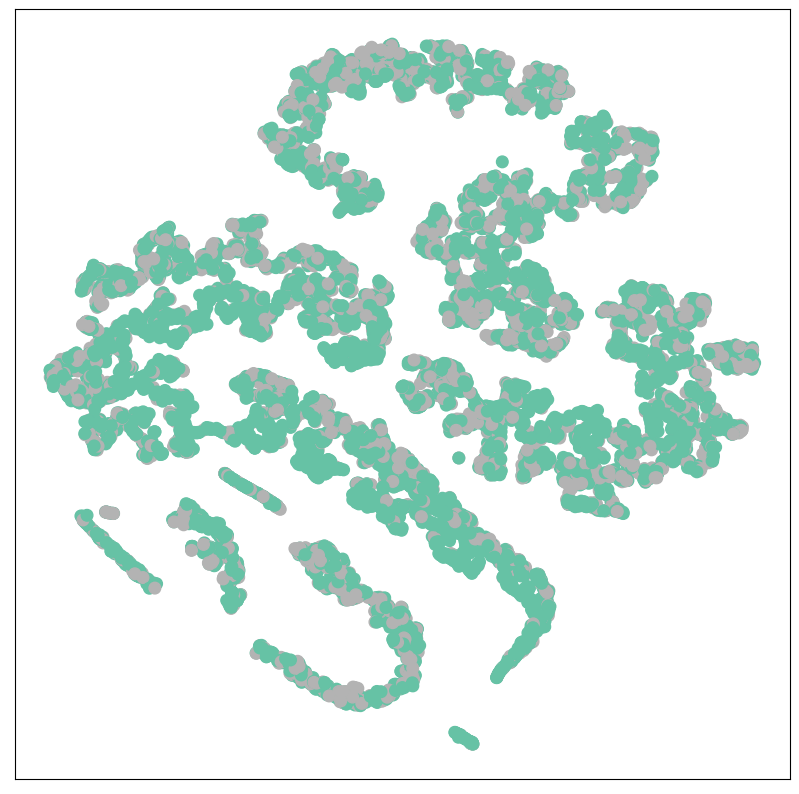

In [520]:
model = GCN(num_node_features=dataset.num_node_features, hidden_channels=16, num_classes=2)
model.eval()

out = model(dataset.x, dataset.edge_index)
visualize(out, color=dataset.y)

In [597]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(num_node_features=dataset.num_node_features, hidden_channels=16, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(dataset.x, dataset.edge_index)  # Perform a single forward pass.
      train_loss = criterion(out[dataset.train_mask], dataset.y[dataset.train_mask])  # Compute the loss solely based on the training nodes.
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      train_correct = pred[dataset.train_mask] == dataset.y[dataset.train_mask]  # Check against ground-truth labels.
      train_acc = int(train_correct.sum()) / int(dataset.train_mask.sum())
      train_loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return float(train_loss.detach()), train_acc


def val():
      model.eval()
      out = model(dataset.x, dataset.edge_index)
      val_loss = criterion(out[dataset.val_mask], dataset.y[dataset.val_mask])
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      val_correct = pred[dataset.val_mask] == dataset.y[dataset.val_mask] # Check against ground-truth labels.
      val_acc = int(val_correct.sum()) / int(dataset.val_mask.sum())  # Derive ratio of correct predictions.
      return float(val_loss.detach()), val_acc


train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 11):
    train_loss, train_acc = train()
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val()
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train loss: 0.7646 Train acc: 0.3127 Validation loss:  0.7395, Validation acc: 0.3203
Epoch: 002, Train loss: 0.7417 Train acc: 0.3127 Validation loss:  0.7167, Validation acc: 0.3260
Epoch: 003, Train loss: 0.7170 Train acc: 0.3242 Validation loss:  0.6958, Validation acc: 0.4299
Epoch: 004, Train loss: 0.6953 Train acc: 0.4649 Validation loss:  0.6768, Validation acc: 0.6811
Epoch: 005, Train loss: 0.6756 Train acc: 0.6863 Validation loss:  0.6601, Validation acc: 0.6811
Epoch: 006, Train loss: 0.6575 Train acc: 0.6907 Validation loss:  0.6463, Validation acc: 0.6811
Epoch: 007, Train loss: 0.6430 Train acc: 0.6935 Validation loss:  0.6358, Validation acc: 0.6811
Epoch: 008, Train loss: 0.6309 Train acc: 0.6959 Validation loss:  0.6283, Validation acc: 0.6811
Epoch: 009, Train loss: 0.6234 Train acc: 0.6957 Validation loss:  0.6236, Validation acc: 0.6811
Epoch: 010, Train loss: 0.6173 Train acc: 0.6965 Validation loss:  0.6216, Validation acc: 0.6811


In [599]:
def test():
      model.eval()
      out = model(dataset.x, dataset.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[dataset.test_mask] == dataset.y[dataset.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(dataset.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

KeyboardInterrupt: 

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

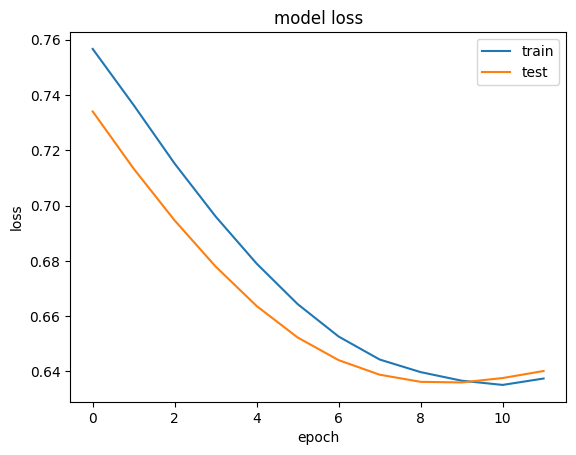

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'acc')

Text(0.5, 0, 'epoch')

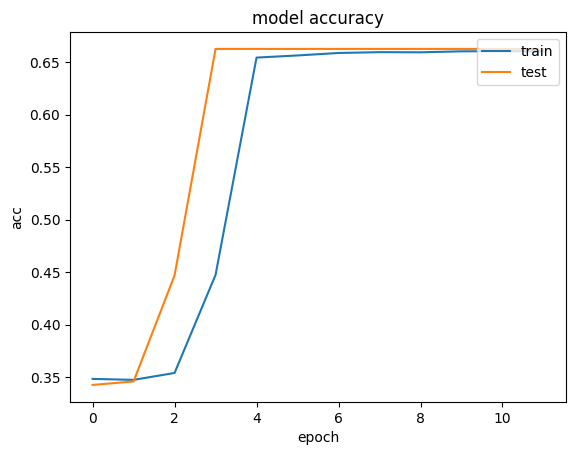

In [523]:
plt.plot(train_loss_history);
plt.plot(val_loss_history);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'test'], loc='upper right');
plt.show()

plt.plot(train_acc_history);
plt.plot(val_acc_history);
plt.title('model accuracy');
plt.ylabel('acc');
plt.xlabel('epoch');
plt.legend(['train', 'test'], loc='upper right');
plt.show()


In [ ]:
model.eval()

out = model(dataset.x, dataset.edge_index)
visualize(out, color=dataset.y)

# Comparison

In [535]:
target_sample = dat_nasf[['accession', 'IP0981_1701']]
target_sample = target_sample[target_sample['IP0981_1701'] > 0]
target_sample

,accession,IP0981_1701
177,A0A087X0M5,428.425824
251,A0A0A0MS15,276.016638
304,A0A0B4J273,293.267677
341,A0A0C4DH31,280.734871
343,A0A0C4DH38,421.102306
...,...,...
7823,Q9Y6N5,2262.723058
7824,Q9Y6N9,89.255380
7826,Q9Y6V7,68.004099
7831,Q9Y6Y8,82.114950


In [591]:
nextprot_proteins_acc = nextprot_dat['acc_code']
negative_reference = nextprot_proteins_acc[~nextprot_proteins_acc.isin(protein_reference)]

In [595]:
# true positive rate (precision)
target_sample['accession'].isin(protein_reference).mean()
# recall
protein_reference.isin(target_sample['accession']).mean()
# true negative rate (specificity)
(~negative_reference.isin(target_sample['accession'])).mean()

0.19359534206695778

0.09097127222982217

0.8472882640755289

In [582]:
# precision
???
# recall
0.67
# specificity

0.3078660143018442

can use it to generate a new score and see if it can bimodal for FDR to discover new  proteins

Extend to multiple datasets case

In [863]:

def load_node_csv(path: str, index_col: str, numeric_cols: list, encoders: object=None, protein_reference=None, **kwargs):
    df = pd.read_csv(path, index_col=index_col, **kwargs)
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    # extract feature doesn't need encoder
    x = torch.tensor(df.loc[:, numeric_cols].values, dtype=torch.float)
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x2 = torch.cat(xs, dim=-1).view(-1, 1)
        x = torch.hstack([x, x2])


    # based on protein reference set to create group-true label
    y = df.index.isin(protein_reference).astype(int)
    y = torch.tensor(y).view(-1).to(dtype=torch.long)

    return x, mapping, y

In [860]:
# ? how to encode the same for two data?

# class CategoricalEncoder(object):
#     def __init__(self, device=None):
#         self.device = device
#         self.model = LabelEncoder()
#
#     @torch.no_grad()
#     def __call__(self, df):
#         x = self.model.fit_transform(df)
#         x = torch.tensor(x)
#         return x.to(self.device)

In [1065]:
numeric_cols = ['protein.avgMass', 'protein.MatchedProducts', 'protein.matchedPeptides', 'protein.digestPeps', 'protein.seqCover(%)', 'protein.MatchedPeptideIntenSum', 'protein.top3MatchedPeptideIntenSum', 'protein.MatchedProductIntenSum', 'protein.sumNumBYCalc', 'protein.sumNumBYPepFrag1', 'protein.falsePositiveRate']
# numeric_cols = ['protein.matchedPeptides', 'protein.seqCover(%)', 'protein.falsePositiveRate']

In [1082]:
x_0981, mapping_0981, y_0981 = load_node_csv('../data/raw-data/processed-combined-protein/combined_protein_0981_processed.csv', index_col='protein.Accession',  numeric_cols=numeric_cols, protein_reference=protein_reference)

In [1083]:
x_7103, mapping_7103, y_7103 = load_node_csv('../data/raw-data/processed-combined-protein/combined_protein_7103_processed.csv', index_col='protein.Accession',numeric_cols=numeric_cols, protein_reference=protein_reference)

In [1068]:
def load_edge_csv(path: str, src_index_col: str, dst_index_col: str, mapping: dict,
                  numeric_cols: list, encoders: dict=None, undirected: bool=True, **kwargs):
    df = pd.read_csv(path, **kwargs)

    # only keep interactions related to proteins that in the protein dataset (i.e. in mapping keys)
    protein_data_acc = mapping.keys()
    df = df[df.protein1_acc.isin(protein_data_acc) & df.protein2_acc.isin(protein_data_acc)]

    src = [mapping[index] for index in df[src_index_col]]
    dst = [mapping[index] for index in df[dst_index_col]]
    edge_index = torch.tensor([src, dst])

    edge_attr = None
    if numeric_cols is not None:
        edge_attr = torch.tensor(df.loc[:, numeric_cols].values, dtype=float)

    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    # add reversed edges if the graph is undirected
    if undirected:
        edge_index_reverse = torch.tensor([dst, src])
        edge_index = torch.cat([edge_index, edge_index_reverse], dim=-1)
        edge_attr = torch.vstack([edge_attr, edge_attr])

    return edge_index, edge_attr

In [1069]:
edge_index_0981, edge_attr_0981 = load_edge_csv('../data/STRING/STRING-interaction-swiss.csv', src_index_col='protein1_acc', dst_index_col='protein2_acc', mapping=mapping_0981,
               numeric_cols=['combined_score'])
edge_index_7103, edge_attr_7103 = load_edge_csv('../data/STRING/STRING-interaction-swiss.csv', src_index_col='protein1_acc', dst_index_col='protein2_acc', mapping=mapping_7103,
               numeric_cols=['combined_score'])

# use the two graph to create a Dataset object

In [1084]:
data_0981 = Data(x=x_0981, edge_index=edge_index_0981, split=1, edge_attr=edge_attr_0981, y=y_0981)
data_7103 = Data(x=x_7103, edge_index=edge_index_7103, split=1, edge_attr=edge_attr_7103, y=y_7103)

In [1085]:
data_0981

Data(x=[10618, 11], edge_index=[2, 9877432], edge_attr=[9877432, 1], y=[10618], split=1)

In [1086]:
import torch_geometric.transforms as T
split_transformer = T.RandomNodeSplit(split='train_rest', num_splits=1, num_val=0.1, num_test=0.1)
data_0981 = split_transformer(data_0981)
data_7103 = split_transformer(data_7103)

In [1087]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

data_list = [data_7103, data_0981]
loader = DataLoader(data_list)

Training

In [1134]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def train(model, optimizer, loader):
    model.train()
    optimizer.zero_grad()  # Clear gradients.

    total_loss = 0
    total_correct = 0
    total_num_nodes = 0

    for data in loader:

        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[data.train_mask] == data.y[data.train_mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += data.train_mask.sum()
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients
        total_loss = loss + total_loss
        acc = total_correct / total_num_nodes

    return total_loss.detach().numpy(), acc


def val(model, loader):
    model.eval()

    total_loss = 0
    total_correct = 0
    total_num_nodes = 0
    for data in loader:
        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        loss = criterion(out[data.val_mask], data.y[data.val_mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[data.val_mask] == data.y[data.val_mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += data.val_mask.sum()
        total_loss = loss + total_loss

    acc = total_correct/total_num_nodes
    return total_loss.detach().numpy(), acc

def test(model, loader):
    model.eval()

    total_loss = 0
    total_correct = 0
    total_num_nodes = 0
    for data in loader:
        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        loss = criterion(out[data.test_mask], data.y[data.test_mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[data.test_mask] == data.y[data.test_mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += data.test_mask.sum()
        total_loss = loss + total_loss

    acc = total_correct/total_num_nodes
    return total_loss.detach().numpy(), acc




<IPython.core.display.Javascript object>

In [1103]:
import sklearn
sklearn.utils.class_weight.compute_class_weight('balanced', classes=np.unique(data_0981.y), y=data_0981.y.numpy())

array([0.72250953, 1.6235474 ])

In [1148]:
model = GCN(num_node_features=11, hidden_channels=22, num_classes=2)
criterion = torch.nn.CrossEntropyLoss(weight=torch.tensor([0.72, 1.6]))
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 101):
    train_loss, train_acc = train(model, optimizer, loader)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val(model, loader)
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

Epoch: 001, Train loss: 19432.7305 Train acc: 0.6522 Validation loss:  16897.4492, Validation acc: 0.6512
Epoch: 002, Train loss: 16440.9805 Train acc: 0.6213 Validation loss:  15412.2354, Validation acc: 0.6271
Epoch: 003, Train loss: 15247.7617 Train acc: 0.6040 Validation loss:  14328.6562, Validation acc: 0.6031
Epoch: 004, Train loss: 15018.0938 Train acc: 0.5931 Validation loss:  13699.4277, Validation acc: 0.5817
Epoch: 005, Train loss: 13908.9277 Train acc: 0.5804 Validation loss:  13295.0869, Validation acc: 0.5719
Epoch: 006, Train loss: 13986.9062 Train acc: 0.5671 Validation loss:  12936.7617, Validation acc: 0.5692
Epoch: 007, Train loss: 13802.5186 Train acc: 0.5610 Validation loss:  12541.3613, Validation acc: 0.5697
Epoch: 008, Train loss: 14450.6777 Train acc: 0.5610 Validation loss:  12146.2363, Validation acc: 0.5735
Epoch: 009, Train loss: 13086.5098 Train acc: 0.5698 Validation loss:  11797.1602, Validation acc: 0.5828
Epoch: 010, Train loss: 12391.4229 Train acc: 

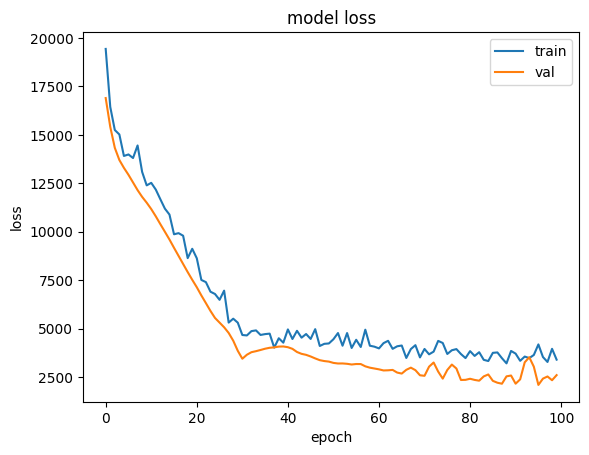

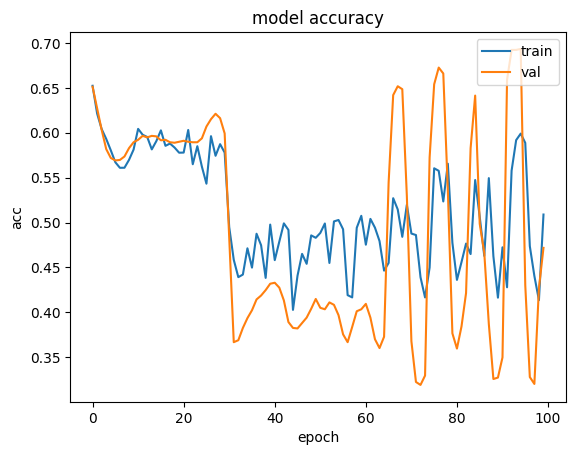

In [1149]:
_ = plt.plot(train_loss_history);
_ = plt.plot(val_loss_history);
_ = plt.title('model loss');
_ = plt.ylabel('loss');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()

_ = plt.plot(train_acc_history);
_ = plt.plot(val_acc_history);
_ = plt.title('model accuracy');
_ = plt.ylabel('acc');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()

In [1150]:
# check output for test node set
out = model(data_0981.x, data_0981.edge_index)  # Perform a single forward pass.
pred = out.argmax(dim=1)
pred.bincount()
data_0981.y.bincount()

tensor([  341, 10277])

tensor([7348, 3270])

ROC AUC

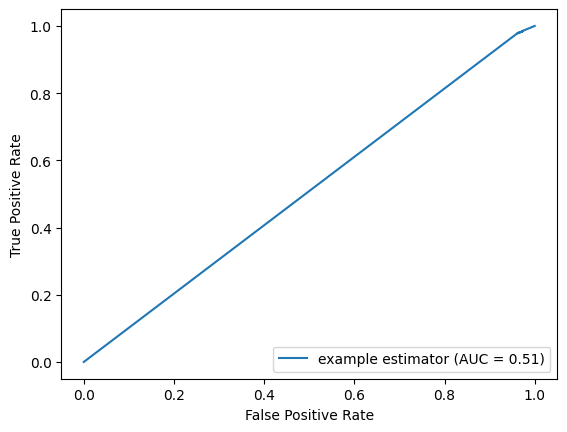

In [1151]:
from sklearn import metrics
probabilities = F.softmax(out, dim=1)[:, 1]
y_score = probabilities.detach().numpy()
fpr, tpr, thresholds = metrics.roc_curve(data_0981.y, y_score)
roc_auc = metrics.auc(fpr, tpr)
 # Plotting
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [1038]:
# from torchmetrics import AUROC
# auroc = AUROC(task='binary')
# auroc(probabilities, data_0981.y)

tensor(0.4810)

In [1064]:
# import networkx as nx
# import torch_geometric.utils
# import matplotlib.pyplot as plt
# G = torch_geometric.utils.to_networkx(data_0981)
# nx.draw(G)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fde4200c550> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fde42034940> (for post_execute):



KeyboardInterrupt



In [1102]:
# from IPython.display import Javascript  # Restrict height of output cell.
# from IPython.display import display
# display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
#
# def train(model, optimizer, loader):
#     model.train()
#     optimizer.zero_grad()  # Clear gradients.
#
#     total_loss = 0
#     total_correct = 0
#     total_num_nodes = 0
#
#     for data in loader:
#
#         out = model(data.x)  # Perform a single forward pass.
#         loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
#         pred = out.argmax(dim=1)  # Use the class with highest probability.
#         total_correct += int((pred[data.train_mask] == data.y[data.train_mask]).sum())  # Check against ground-truth labels.
#         total_num_nodes += data.train_mask.sum()
#         loss.backward()  # Derive gradients.
#         optimizer.step()  # Update parameters based on gradients
#         total_loss = loss + total_loss
#         acc = total_correct / total_num_nodes
#
#     return total_loss.detach().numpy(), acc
#
#
# def val(model, loader):
#     model.eval()
#
#     total_loss = 0
#     total_correct = 0
#     total_num_nodes = 0
#     for data in loader:
#         out = model(data.x)  # Perform a single forward pass.
#         loss = criterion(out[data.val_mask], data.y[data.val_mask])  # Compute the loss solely based on the training nodes.
#         pred = out.argmax(dim=1)  # Use the class with highest probability.
#         total_correct += int((pred[data.val_mask] == data.y[data.val_mask]).sum())  # Check against ground-truth labels.
#         total_num_nodes += data.val_mask.sum()
#         total_loss = loss + total_loss
#         acc = total_correct / total_num_nodes
#
#     acc = total_correct/total_num_nodes
#     return total_loss.detach().numpy(), acc


<IPython.core.display.Javascript object>

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        # x = F.normalize(x) # normalize make bad result why?
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

In [1156]:
# model = GCN(num_node_features=7, hidden_channels=16, num_classes=2)
model = MLP(num_features=11, hidden_channels=22, num_classes=2)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001)

criterion = torch.nn.CrossEntropyLoss(weight=torch.tensor([0.72, 1.6]), reduction='mean')

train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 1001):
    train_loss, train_acc = train(model, optimizer, loader)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val(model, loader)
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

Epoch: 001, Train loss: 48699.4141 Train acc: 0.5305 Validation loss:  21617.6582, Validation acc: 0.5205
Epoch: 002, Train loss: 16038.3193 Train acc: 0.5532 Validation loss:  2770.3342, Validation acc: 0.6971
Epoch: 003, Train loss: 2132.0876 Train acc: 0.5308 Validation loss:  848.4545, Validation acc: 0.4669
Epoch: 004, Train loss: 526.0911 Train acc: 0.5572 Validation loss:  512.5935, Validation acc: 0.6971
Epoch: 005, Train loss: 362.1111 Train acc: 0.5532 Validation loss:  37.0746, Validation acc: 0.5298
Epoch: 006, Train loss: 130.7688 Train acc: 0.6442 Validation loss:  437.8744, Validation acc: 0.4948
Epoch: 007, Train loss: 270.4045 Train acc: 0.5114 Validation loss:  608.2342, Validation acc: 0.6966
Epoch: 008, Train loss: 374.0411 Train acc: 0.6889 Validation loss:  155.1086, Validation acc: 0.5522
Epoch: 009, Train loss: 124.0617 Train acc: 0.5640 Validation loss:  6.5188, Validation acc: 0.6911
Epoch: 010, Train loss: 9.5688 Train acc: 0.5984 Validation loss:  34.8755, V

KeyboardInterrupt: 

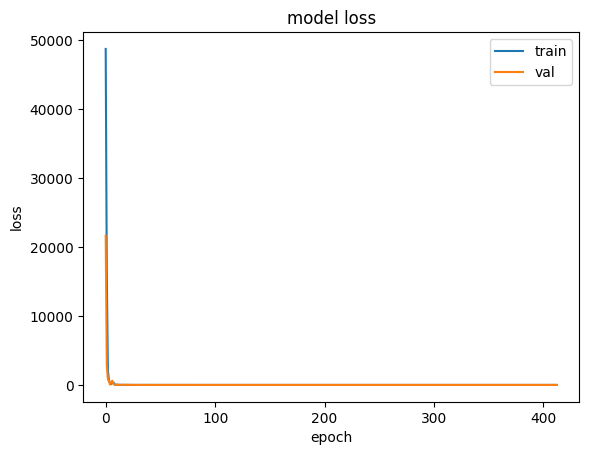

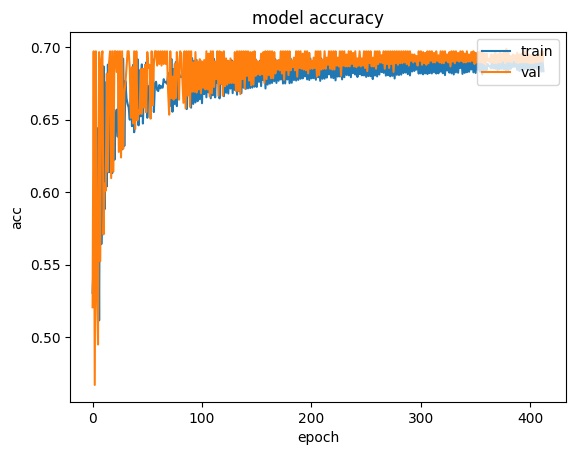

In [1157]:
_ = plt.plot(train_loss_history);
_ = plt.plot(val_loss_history);
_ = plt.title('model loss');
_ = plt.ylabel('loss');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()

_ = plt.plot(train_acc_history);
_ = plt.plot(val_acc_history);
_ = plt.title('model accuracy');
_ = plt.ylabel('acc');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()


In [1158]:
out = model(data_0981.x)  # Perform a single forward pass.
pred = out.argmax(dim=1)
pred.bincount()
data_0981.y.bincount()

(pred[data_0981.test_mask] == data_0981.y[data_0981.test_mask]).float().mean()

tensor([10429,   189])

tensor([7348, 3270])

tensor(0.6695)

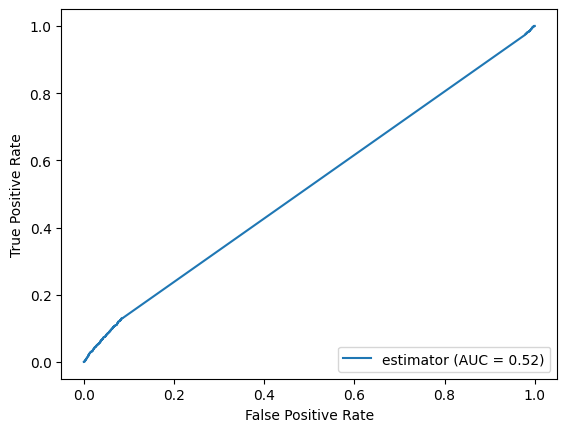

In [1162]:
from sklearn import metrics
probabilities = F.softmax(out, dim=1)[:, 1]
y_score = probabilities.detach().numpy()
fpr, tpr, thresholds = metrics.roc_curve(data_0981.y, y_score)
roc_auc = metrics.auc(fpr, tpr)
 # Plotting
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
roc_display.plot()
plt.show()

In [1160]:
_, test_acc = test(model, loader)
test_acc

tensor(0.6905)

In [1138]:
out = model(data_0981.x)  # Perform a single forward pass.
out = out[data_0981.test_mask]
pred = out.argmax(dim=1)
pred.bincount()
data_0981.y.bincount()

(pred[data_0981.test_mask] == data_0981.y[data_0981.test_mask]).float().mean()

tensor([1062])

tensor([7348, 3270])

IndexError: The shape of the mask [10618] at index 0 does not match the shape of the indexed tensor [1062] at index 0